# Algoritmo Fuzzy

## Fonte: SCIKIT FUZZY
### https://pythonhosted.org/scikit-fuzzy/


### Carlos nobuaki

In [41]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

### Nesse exemplo eu levo em conta a qualidade do produto, a qualidade do serviço e determino a porcentagem de comissão da venda

In [42]:
prod = np.arange(0,11, 1)
serv = np.arange(0,11,1)
comis = np.arange(0,15,1)

## Função de pertinência triangular
### gerando a pontuação para os níveis de serviço e produto  ----->    prod = Produto,  serv = Serviço,   comis = Comissão da venda

In [43]:
prod_qualo = fuzz.trimf(prod, [0, 0, 5])
prod_qualmd = fuzz.trimf(prod, [0, 5, 10])
prod_qualhi = fuzz.trimf(prod, [5, 10, 10])
serv_lo = fuzz.trimf(serv, [0, 0, 5])
serv_md = fuzz.trimf(serv, [0, 5, 10])
serv_hi = fuzz.trimf(serv, [5, 10, 10])
comis_lo = fuzz.trimf(comis, [0, 0, 13])
comis_md = fuzz.trimf(comis, [0, 13, 25])
comis_hi = fuzz.trimf(comis, [13, 25, 25])

### Visualização dos ambientes e função de pertinência

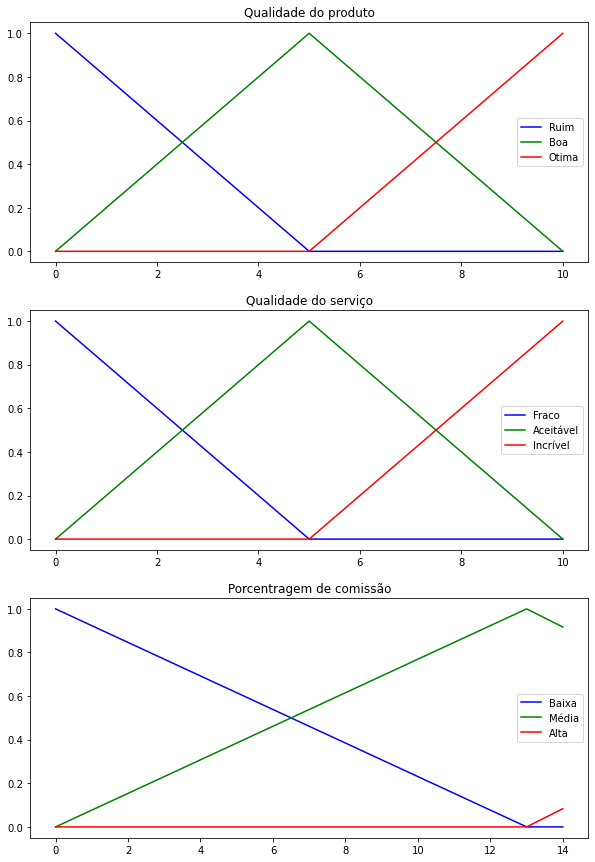

In [44]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 15))
ax0.plot(prod, prod_qualo, 'b', linewidth=1.5, label='Ruim')
ax0.plot(prod, prod_qualmd, 'g', linewidth=1.5, label='Boa')
ax0.plot(prod, prod_qualhi, 'r', linewidth=1.5, label='Otima')
ax0.set_title('Qualidade do produto')
ax0.legend()

ax1.plot(serv, serv_lo, 'b', linewidth=1.5, label='Fraco')
ax1.plot(serv, serv_md, 'g', linewidth=1.5, label='Aceitável')
ax1.plot(serv, serv_hi, 'r', linewidth=1.5, label='Incrível')
ax1.set_title('Qualidade do serviço')
ax1.legend()

ax2.plot(comis, comis_lo, 'b', linewidth=1.5, label='Baixa')
ax2.plot(comis, comis_md, 'g', linewidth=1.5, label='Média')
ax2.plot(comis, comis_hi, 'r', linewidth=1.5, label='Alta')
ax2.set_title('Porcentragem de comissão')
ax2.legend()


### Precisamos da ativação de nossas funções de pertinência fuzzy nesses valores.
### Os valores exatos que escolhi são: 6,5 e 9,8 não existem em nossos ambientes (escala)...
### É para isso que existe fuzz.interp_membership!


# Plotando as regras

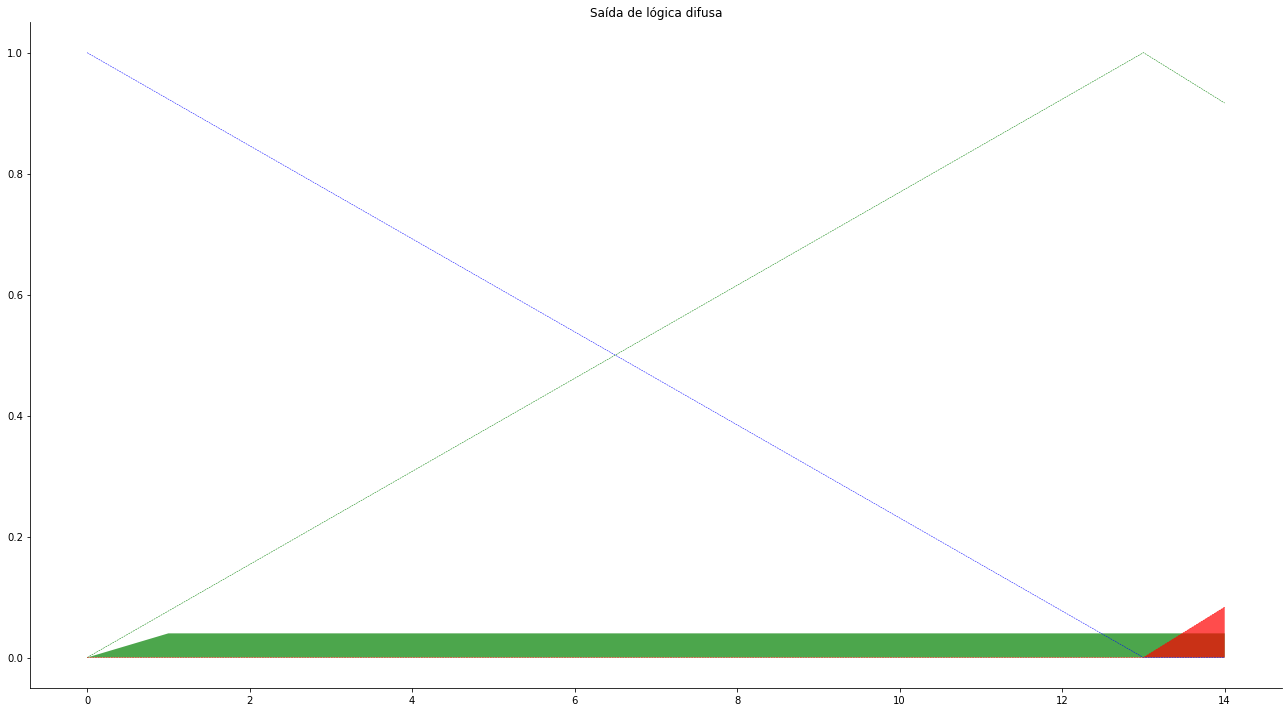

In [45]:
prodqual_level_lo = fuzz.interp_membership(prod, prod_qualo, 6.5)
prodqual_level_md = fuzz.interp_membership(prod, prod_qualmd, 6.5)
prodqual_level_hi = fuzz.interp_membership(prod, prod_qualhi, 6.5)

serv_level_lo = fuzz.interp_membership(serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(serv, serv_hi, 9.8)

# Agora pegamos nossas regras e as aplicamos. A regra 1 diz respeito à um produto mal feito OU serviço.
# O operador OR significa que pegamos o máximo desses dois.
active_rule1 = np.fmax(prodqual_level_lo, serv_level_lo)

# Agora aplicamos isso cortando o topo da saída correspondente
# função de associação com `np.fmin`
comissao_baixa = np.fmin(active_rule1, comis_lo)  # removido inteiramente para 0

# Para a regra 2, conectamos o serviço aceitável à comissão média
comissao_media = np.fmin(serv_level_md, comis_md)

# Para a regra 3, conectamos serviço alto OU produto ótimo com comissão alta
active_rule3 = np.fmax(prodqual_level_hi, serv_level_hi)
comissao_alta = np.fmin(active_rule3, comis_hi)
comissao0 = np.zeros_like(comis)

# Visualização
fig, ax0 = plt.subplots(figsize=(18, 10))

ax0.fill_between(comis, comissao0, comissao_baixa, facecolor='b', alpha=0.7)
ax0.plot(comis, comis_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(comis, comissao0, comissao_media, facecolor='g', alpha=0.7)
ax0.plot(comis, comis_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(comis, comissao0, comissao_alta, facecolor='r', alpha=0.7)
ax0.plot(comis, comis_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Saída de lógica difusa')

# Apagando os eixos superior/direito
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Agregando todas as funções de associação de saída juntas

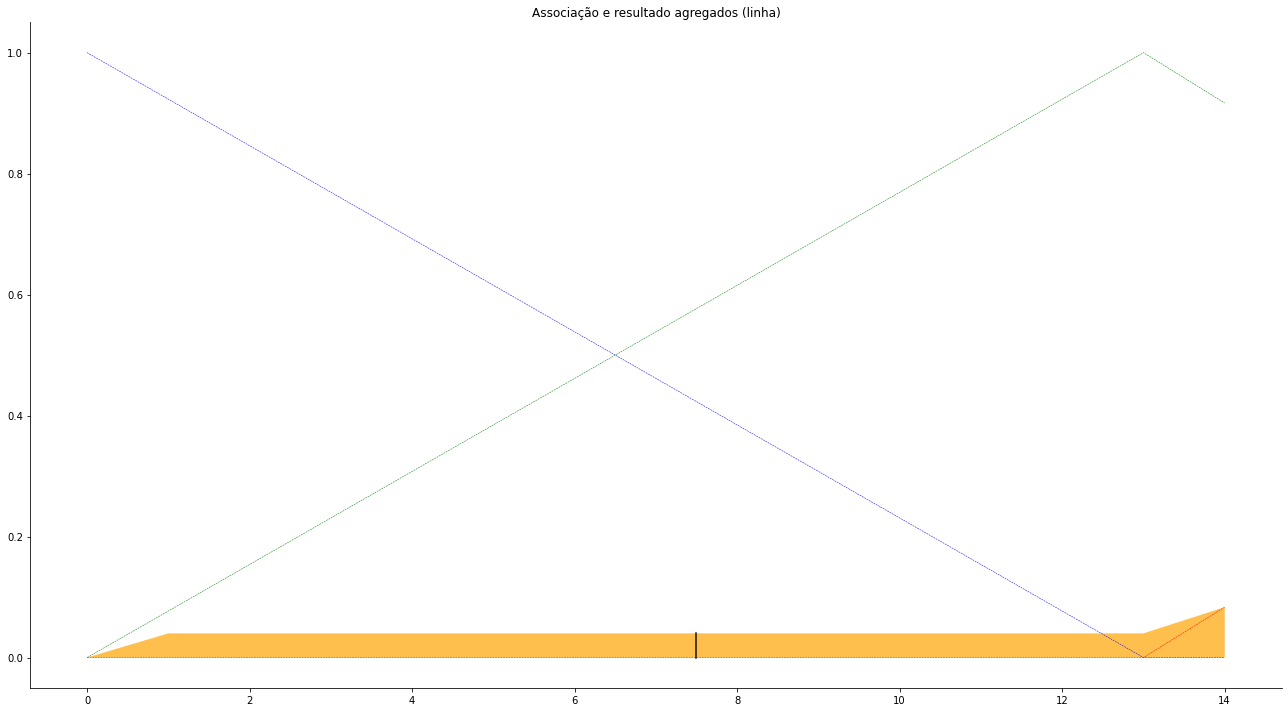

In [46]:
aggregated = np.fmax(comissao_baixa,
                     np.fmax(comissao_media, comissao_alta))

# Calculando resultado defuzzificado
tip = fuzz.defuzz(comis, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(comis, aggregated, tip)  # plotando

# Visualização
fig, ax0 = plt.subplots(figsize=(18, 10))

ax0.plot(comis, comis_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(comis, comis_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(comis, comis_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(comis, comissao0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Associação e resultado agregados (linha)')

# Apagando os eixos superior/direito
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Comissão: 7,6%